In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from standardize_datasets import preprocess

In [12]:
df = pd.read_csv('data/train.csv')
df.drop(columns=['id', 'author'], inplace=True)
df.dropna(inplace=True)
df.head(10)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,Donald J. Trump is scheduled to make a highly ...,0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",A week before Michael T. Flynn resigned as nat...,0


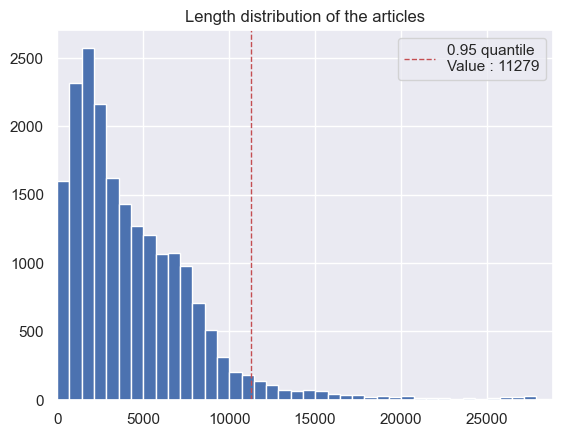

In [13]:
# Display the length distribution of the articles
df["text"].str.len().hist(bins=200)
alpha = 0.95
alpha_display = 0.995
limit = int(df["text"].str.len().quantile(alpha))
plt.axvline(limit, color='r', linestyle='dashed', linewidth=1, label=f"%.2f quantile \nValue : {limit}" % alpha)
plt.legend()
plt.xlim(0, df["text"].str.len().quantile(alpha_display))
plt.title(f"Length distribution of the articles")

plt.show()

In [14]:
# For the rest, we will use the 95% quantile
df = df[df["text"].str.len() < limit]
df.to_csv('data/train_clean.csv', index=False)

<Axes: title={'center': 'Number of articles in each category'}>

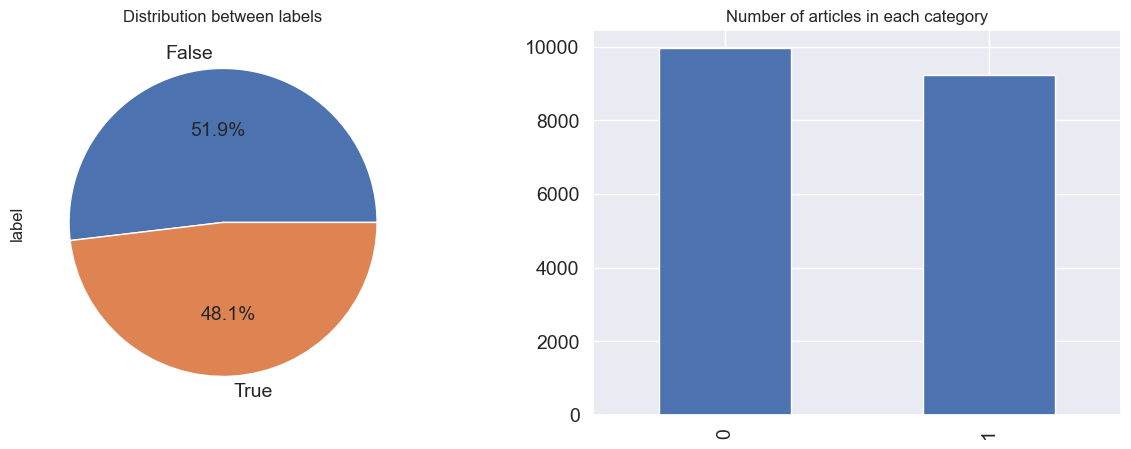

In [15]:
# Subplot pie distribution between labels and number of articles in each category using bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df["label"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['False', 'True'],
    title='Distribution between labels',
    fontsize=14,
    ax=ax1
)
df["label"].value_counts().plot(
    kind='bar',
    title='Number of articles in each category',
    fontsize=14,
    ax=ax2
)


In [ ]:
df["text"] = preprocess(df["text"])
df.to_csv('data/train_clean_preprocessed.csv', index=False)